clone repo từ github về + change dir vào chỗ file salary.csv

In [ ]:
!git clone https://github.com/blackfox20092006/SP26-AI1904-DAP391m

Cloning into 'SP26-AI1904-DAP391m'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 21 (delta 2), reused 14 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 54.74 KiB | 737.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
%cd SP26-AI1904-DAP391m/
!ls
%cd data
!ls

/content/SP26-AI1904-DAP391m/data/SP26-AI1904-DAP391m/data/SP26-AI1904-DAP391m/data/SP26-AI1904-DAP391m
 data  'lab 1'	'lab 2'   README.md
/content/SP26-AI1904-DAP391m/data/SP26-AI1904-DAP391m/data/SP26-AI1904-DAP391m/data/SP26-AI1904-DAP391m/data
Salary_dataset.csv  titanic.csv


đọc file csv + xem structure của dataframe

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
a = pd.read_csv('Salary_dataset.csv')
a.describe()
a.info()
a.head()
print(a.dtypes)
a.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object


Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

làm model linear regression, biến dự đoán là Salary, còn data là biến YoE, chia train/test theo tỉ lệ 80%/20%

In [ ]:
x = a[['YearsExperience']]
y = a['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
output = model.predict(x_test)


đánh giá model trên 3 thông số r2, mae, mse dựa vào output và ground-truth

model có độ chính xác cực kỳ cao khi giải thích được 98,8% sự biến thiên của dữ liệu, tuy nhiên sự chênh lệch giữa RMSE và MAE  cho thấy vẫn còn một số outliers gây ra sai số lớn

In [ ]:
r2 = r2_score(y_test, output)
mae = mean_absolute_error(y_test, output)
mse = mean_squared_error(y_test, output)
print(r2, mae, mse)

0.988169515729126 2446.17236904651 12823412.298126565


plot ra scatter chart của mô hình thể hiện giữa prediction và ground-truth

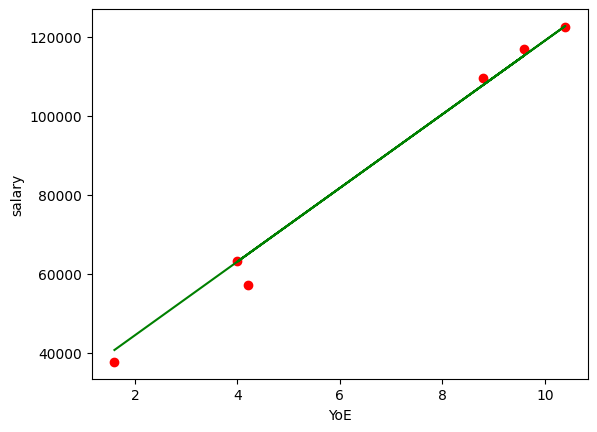

In [ ]:
plt.scatter(x_test, y_test, color='red', label='ground-truth')
plt.plot(x_test, output, color='green', label='prediction')
plt.xlabel('YoE')
plt.ylabel('salary')
plt.show()